In [1]:
import numpy as np
import pandas as pd

In [2]:
BASE_DIR = "../csv/univ3-data/"

In [3]:
FILENAME = "univ3-usdceth-03"
FILEPATH = f"{BASE_DIR}raw/{FILENAME}.csv"

In [4]:
FILEPATH

'../csv/univ3-data/raw/univ3-usdceth-03.csv'

In [5]:
DECIMALS_0 = 6
DECIMALS_1 = 18

In [6]:
df = pd.read_csv(FILEPATH, parse_dates=['evt_block_time'], dtype={'sqrtPriceX96': np.longdouble, 'tick': np.int, 'liquidity': np.longdouble})
df

,evt_block_time,sqrtPriceX96,tick,liquidity
0,2021-05-05 01:56:23+00:00,1.377933e+33,195285,4.303370e+15
1,2021-05-05 08:23:26+00:00,1.378851e+33,195298,4.303370e+15
2,2021-05-05 09:50:51+00:00,1.378852e+33,195298,4.303370e+15
3,2021-05-05 11:59:57+00:00,1.378852e+33,195298,4.304946e+15
4,2021-05-05 12:56:56+00:00,1.370242e+33,195173,4.304946e+15
...,...,...,...,...
147038,2021-10-18 15:24:08+00:00,1.293976e+33,194027,1.557486e+19
147039,2021-10-18 15:24:08+00:00,1.293986e+33,194027,1.557486e+19
147040,2021-10-18 15:24:11+00:00,1.294369e+33,194033,1.557486e+19
147041,2021-10-18 15:24:26+00:00,1.294371e+33,194033,1.557486e+19


In [7]:
def get_quote(sqrt_price_x96: np.float, is_y_x: bool, amount_in: int) -> int:
    if is_y_x:
        return int(sqrt_price_x96)**2 * amount_in / (1 << 192)
    else:
        return (1 << 192) * amount_in / int(sqrt_price_x96)**2
    
def get_reserve(sqrt_price_x96: np.float, liquidity: np.float, is_x: bool) -> int:
    if is_x:
        return (int(liquidity) << 96) / int(sqrt_price_x96)
    else:
        return (int(liquidity) * int(sqrt_price_x96)) / (1 << 96)

In [8]:
p0s = df['sqrtPriceX96'].apply(lambda x: get_quote(x, True, 10**(DECIMALS_0)))
p1s = df['sqrtPriceX96'].apply(lambda x: get_quote(x, False, 10**(DECIMALS_1)))

In [9]:
# Store the prices in original df
df['y/x'] = p0s
df['x/y'] = p1s

In [10]:
df

,evt_block_time,sqrtPriceX96,tick,liquidity,y/x,x/y
0,2021-05-05 01:56:23+00:00,1.377933e+33,195285,4.303370e+15,3.024802e+14,3.306002e+09
1,2021-05-05 08:23:26+00:00,1.378851e+33,195298,4.303370e+15,3.028832e+14,3.301602e+09
2,2021-05-05 09:50:51+00:00,1.378852e+33,195298,4.303370e+15,3.028841e+14,3.301593e+09
3,2021-05-05 11:59:57+00:00,1.378852e+33,195298,4.304946e+15,3.028841e+14,3.301593e+09
4,2021-05-05 12:56:56+00:00,1.370242e+33,195173,4.304946e+15,2.991129e+14,3.343220e+09
...,...,...,...,...,...,...
147038,2021-10-18 15:24:08+00:00,1.293976e+33,194027,1.557486e+19,2.667433e+14,3.748923e+09
147039,2021-10-18 15:24:08+00:00,1.293986e+33,194027,1.557486e+19,2.667475e+14,3.748864e+09
147040,2021-10-18 15:24:11+00:00,1.294369e+33,194033,1.557486e+19,2.669054e+14,3.746646e+09
147041,2021-10-18 15:24:26+00:00,1.294371e+33,194033,1.557486e+19,2.669060e+14,3.746638e+09


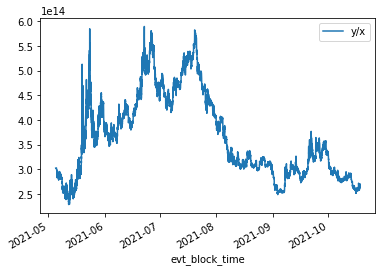

In [11]:
df.plot(x='evt_block_time', y='y/x')

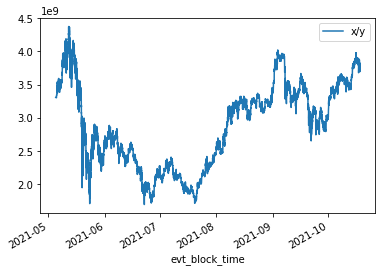

In [12]:
df.plot(x='evt_block_time', y='x/y')

In [13]:
# determine x, y reserves
xs = df.filter(items=['sqrtPriceX96', 'liquidity']).apply(lambda args: get_reserve(*args, is_x=True), axis=1)
ys = df.filter(items=['sqrtPriceX96', 'liquidity']).apply(lambda args: get_reserve(*args, is_x=False), axis=1)

In [14]:
df['x'] = xs
df['y'] = ys

In [15]:
df

,evt_block_time,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y
0,2021-05-05 01:56:23+00:00,1.377933e+33,195285,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19
1,2021-05-05 08:23:26+00:00,1.378851e+33,195298,4.303370e+15,3.028832e+14,3.301602e+09,2.472698e+11,7.489387e+19
2,2021-05-05 09:50:51+00:00,1.378852e+33,195298,4.303370e+15,3.028841e+14,3.301593e+09,2.472694e+11,7.489397e+19
3,2021-05-05 11:59:57+00:00,1.378852e+33,195298,4.304946e+15,3.028841e+14,3.301593e+09,2.473600e+11,7.492141e+19
4,2021-05-05 12:56:56+00:00,1.370242e+33,195173,4.304946e+15,2.991129e+14,3.343220e+09,2.489145e+11,7.445353e+19
...,...,...,...,...,...,...,...,...
147038,2021-10-18 15:24:08+00:00,1.293976e+33,194027,1.557486e+19,2.667433e+14,3.748923e+09,9.536244e+14,2.543729e+23
147039,2021-10-18 15:24:08+00:00,1.293986e+33,194027,1.557486e+19,2.667475e+14,3.748864e+09,9.536169e+14,2.543749e+23
147040,2021-10-18 15:24:11+00:00,1.294369e+33,194033,1.557486e+19,2.669054e+14,3.746646e+09,9.533347e+14,2.544502e+23
147041,2021-10-18 15:24:26+00:00,1.294371e+33,194033,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23


In [16]:
df.set_index('evt_block_time', inplace=True)

In [17]:
df

,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y
evt_block_time,,,,,,,
2021-05-05 01:56:23+00:00,1.377933e+33,195285,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19
2021-05-05 08:23:26+00:00,1.378851e+33,195298,4.303370e+15,3.028832e+14,3.301602e+09,2.472698e+11,7.489387e+19
2021-05-05 09:50:51+00:00,1.378852e+33,195298,4.303370e+15,3.028841e+14,3.301593e+09,2.472694e+11,7.489397e+19
2021-05-05 11:59:57+00:00,1.378852e+33,195298,4.304946e+15,3.028841e+14,3.301593e+09,2.473600e+11,7.492141e+19
2021-05-05 12:56:56+00:00,1.370242e+33,195173,4.304946e+15,2.991129e+14,3.343220e+09,2.489145e+11,7.445353e+19
...,...,...,...,...,...,...,...
2021-10-18 15:24:08+00:00,1.293976e+33,194027,1.557486e+19,2.667433e+14,3.748923e+09,9.536244e+14,2.543729e+23
2021-10-18 15:24:08+00:00,1.293986e+33,194027,1.557486e+19,2.667475e+14,3.748864e+09,9.536169e+14,2.543749e+23
2021-10-18 15:24:11+00:00,1.294369e+33,194033,1.557486e+19,2.669054e+14,3.746646e+09,9.533347e+14,2.544502e+23


In [18]:
df_resampled = df.resample('15s').mean()
df_resampled.ffill(inplace=True)
df_resampled

,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y
evt_block_time,,,,,,,
2021-05-05 01:56:15+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19
2021-05-05 01:56:30+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19
2021-05-05 01:56:45+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19
2021-05-05 01:57:00+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19
2021-05-05 01:57:15+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19
...,...,...,...,...,...,...,...
2021-10-18 15:40:45+00:00,1.294371e+33,194033.0,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23
2021-10-18 15:41:00+00:00,1.294371e+33,194033.0,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23
2021-10-18 15:41:15+00:00,1.294371e+33,194033.0,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23


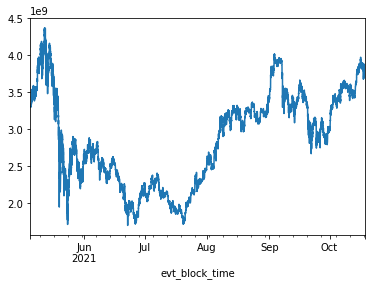

In [19]:
df_resampled['x/y'].plot()

In [20]:
def geo_avg(w, t):  
    return w[0]*np.prod(w/w[0])**(1/t) if len(w) != 0 else np.nan

In [21]:
WINDOW_10M = 40
WINDOW_1H = 240

In [22]:
df_resampled['x/y'].rolling(window=WINDOW_1H).apply(lambda w: geo_avg(w, WINDOW_1H), raw=True)

evt_block_time
2021-05-05 01:56:15+00:00             NaN
2021-05-05 01:56:30+00:00             NaN
2021-05-05 01:56:45+00:00             NaN
2021-05-05 01:57:00+00:00             NaN
2021-05-05 01:57:15+00:00             NaN
                                 ...     
2021-10-18 15:40:45+00:00    3.770663e+09
2021-10-18 15:41:00+00:00    3.770437e+09
2021-10-18 15:41:15+00:00    3.770211e+09
2021-10-18 15:41:30+00:00    3.769986e+09
2021-10-18 15:41:45+00:00    3.769760e+09
Freq: 15S, Name: x/y, Length: 959463, dtype: float64

In [23]:
# determine geometric twaps
p1s_twap10m = df_resampled['x/y'].rolling(window=WINDOW_10M).apply(lambda w: geo_avg(w, WINDOW_10M), raw=True)
p1s_twap1h = df_resampled['x/y'].rolling(window=WINDOW_1H).apply(lambda w: geo_avg(w, WINDOW_1H), raw=True)

In [24]:
p1s_twap10m

evt_block_time
2021-05-05 01:56:15+00:00             NaN
2021-05-05 01:56:30+00:00             NaN
2021-05-05 01:56:45+00:00             NaN
2021-05-05 01:57:00+00:00             NaN
2021-05-05 01:57:15+00:00             NaN
                                 ...     
2021-10-18 15:40:45+00:00    3.746638e+09
2021-10-18 15:41:00+00:00    3.746638e+09
2021-10-18 15:41:15+00:00    3.746638e+09
2021-10-18 15:41:30+00:00    3.746638e+09
2021-10-18 15:41:45+00:00    3.746639e+09
Freq: 15S, Name: x/y, Length: 959463, dtype: float64

In [25]:
p1s_twap1h

evt_block_time
2021-05-05 01:56:15+00:00             NaN
2021-05-05 01:56:30+00:00             NaN
2021-05-05 01:56:45+00:00             NaN
2021-05-05 01:57:00+00:00             NaN
2021-05-05 01:57:15+00:00             NaN
                                 ...     
2021-10-18 15:40:45+00:00    3.770663e+09
2021-10-18 15:41:00+00:00    3.770437e+09
2021-10-18 15:41:15+00:00    3.770211e+09
2021-10-18 15:41:30+00:00    3.769986e+09
2021-10-18 15:41:45+00:00    3.769760e+09
Freq: 15S, Name: x/y, Length: 959463, dtype: float64

In [26]:
df_resampled['x/y twap 10m'] = p1s_twap10m
df_resampled['x/y twap 1h'] = p1s_twap1h

In [27]:
df_resampled

,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y,x/y twap 10m,x/y twap 1h
evt_block_time,,,,,,,,,
2021-05-05 01:56:15+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN
2021-05-05 01:56:30+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN
2021-05-05 01:56:45+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN
2021-05-05 01:57:00+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN
2021-05-05 01:57:15+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-10-18 15:40:45+00:00,1.294371e+33,194033.0,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23,3.746638e+09,3.770663e+09
2021-10-18 15:41:00+00:00,1.294371e+33,194033.0,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23,3.746638e+09,3.770437e+09
2021-10-18 15:41:15+00:00,1.294371e+33,194033.0,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23,3.746638e+09,3.770211e+09


/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


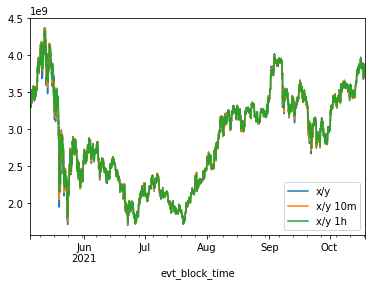

In [28]:
ax = df_resampled['x/y'].plot(label='x/y')
df_resampled['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

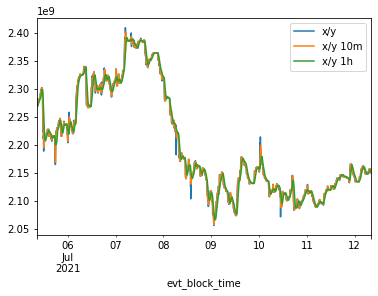

In [29]:
rng = (df_resampled.index > "2021-07-05 08:23:26+00:00") & (df_resampled.index < "2021-07-12 08:23:26+00:00")

ax = df_resampled[rng]['x/y'].plot(label='x/y')
df_resampled[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

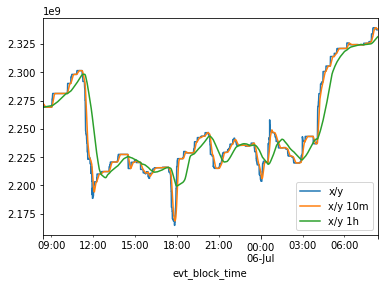

In [30]:
rng = (df_resampled.index > "2021-07-05 08:23:26+00:00") & (df_resampled.index < "2021-07-06 08:23:26+00:00")

ax = df_resampled[rng]['x/y'].plot(label='x/y')
df_resampled[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

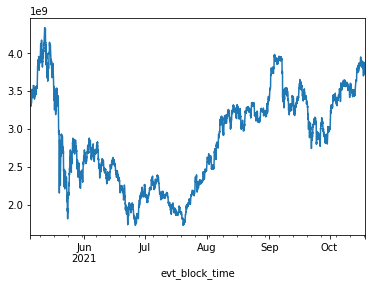

In [31]:
p1s_twap1h.plot()

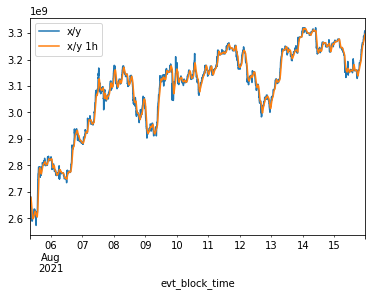

In [32]:
rng = (df_resampled.index > "2021-08-05 08:23:26+00:00") & (df_resampled.index < "2021-08-15 23:23:26+00:00")

ax = df_resampled[rng]['x/y'].plot(label='x/y')
df_resampled[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

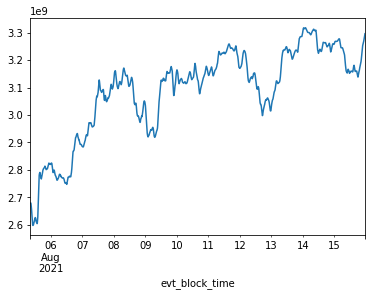

In [33]:
df_resampled[(df_resampled.index > "2021-08-05 08:23:26+00:00") & (df_resampled.index < "2021-08-15 23:23:26+00:00")]['x/y twap 1h'].plot(label='x/y 1h')

In [34]:
# determine time-averaged liquidity
xs_twa10m = df_resampled['x'].rolling(window=WINDOW_10M).apply(lambda w: geo_avg(w, WINDOW_10M), raw=True)
ys_twa10m = df_resampled['y'].rolling(window=WINDOW_10M).apply(lambda w: geo_avg(w, WINDOW_10M), raw=True)

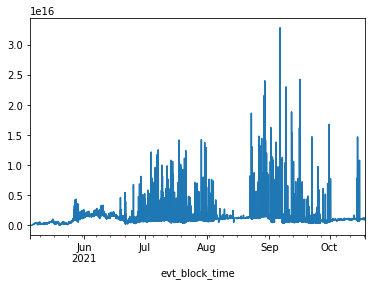

In [35]:
xs_twa10m.plot()

In [36]:
df_resampled['x 10m avg'] = xs_twa10m
df_resampled['y 10m avg'] = ys_twa10m

In [37]:
df_resampled

,sqrtPriceX96,tick,liquidity,y/x,x/y,x,y,x/y twap 10m,x/y twap 1h,x 10m avg,y 10m avg
evt_block_time,,,,,,,,,,,
2021-05-05 01:56:15+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN,NaN,NaN
2021-05-05 01:56:30+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN,NaN,NaN
2021-05-05 01:56:45+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN,NaN,NaN
2021-05-05 01:57:00+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN,NaN,NaN
2021-05-05 01:57:15+00:00,1.377933e+33,195285.0,4.303370e+15,3.024802e+14,3.306002e+09,2.474345e+11,7.484402e+19,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18 15:40:45+00:00,1.294371e+33,194033.0,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23,3.746638e+09,3.770663e+09,9.533337e+14,2.544505e+23
2021-10-18 15:41:00+00:00,1.294371e+33,194033.0,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23,3.746638e+09,3.770437e+09,9.533337e+14,2.544505e+23
2021-10-18 15:41:15+00:00,1.294371e+33,194033.0,1.557486e+19,2.669060e+14,3.746638e+09,9.533337e+14,2.544505e+23,3.746638e+09,3.770211e+09,9.533337e+14,2.544505e+23


In [38]:
df_resampled_sqrd = df_resampled.resample('60s').mean()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


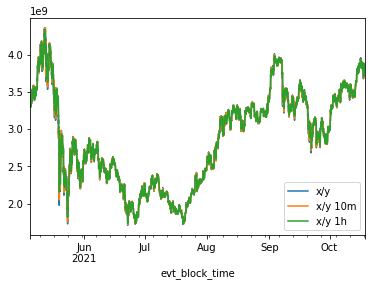

In [39]:
ax = df_resampled_sqrd['x/y'].plot(label='x/y')
df_resampled_sqrd['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled_sqrd['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

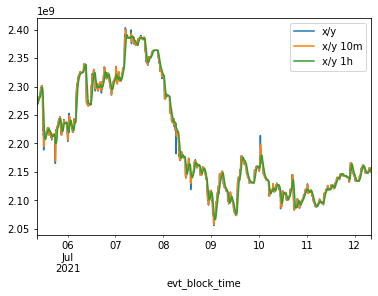

In [40]:
rng = (df_resampled_sqrd.index > "2021-07-05 08:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-12 08:23:26+00:00")

ax = df_resampled_sqrd[rng]['x/y'].plot(label='x/y')
df_resampled_sqrd[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled_sqrd[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

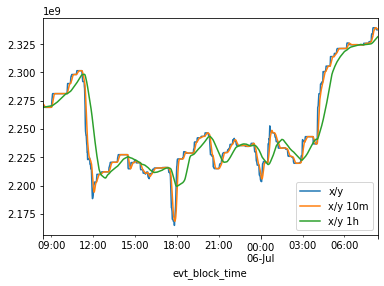

In [41]:
rng = (df_resampled_sqrd.index > "2021-07-05 08:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-06 08:23:26+00:00")

ax = df_resampled_sqrd[rng]['x/y'].plot(label='x/y')
df_resampled_sqrd[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled_sqrd[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

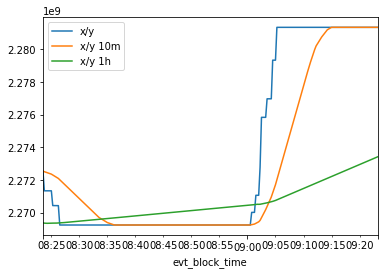

In [42]:
rng = (df_resampled.index > "2021-07-05 08:23:26+00:00") & (df_resampled.index < "2021-07-05 09:23:26+00:00")

ax = df_resampled[rng]['x/y'].plot(label='x/y')
df_resampled[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

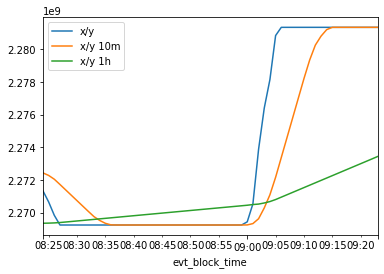

In [43]:
rng = (df_resampled_sqrd.index > "2021-07-05 08:23:26+00:00") & (df_resampled_sqrd.index < "2021-07-05 09:23:26+00:00")

ax = df_resampled_sqrd[rng]['x/y'].plot(label='x/y')
df_resampled_sqrd[rng]['x/y twap 10m'].plot(ax=ax, label='x/y 10m')
df_resampled_sqrd[rng]['x/y twap 1h'].plot(ax=ax, label='x/y 1h')
ax.legend()

In [44]:
OUTFILE = f"{BASE_DIR}clean/{FILENAME}-cleaned.csv"

In [45]:
df_resampled_sqrd.to_csv(OUTFILE)